In [6]:
# Breaks File into Chunks

def chunk_text(text, chunk_size=1000):
    words = text.split()
    chunks = []
    for i in range(0, len(words), chunk_size):
        chunk = ' '.join(words[i:i+chunk_size])
        chunks.append(chunk)
    return chunks

# Read the book in smaller chunks to avoid segmentation fault
def read_file_in_chunks(file_path, chunk_size=1000):
    with open(file_path, "r", encoding="utf-8") as file:
        while True:
            chunk = file.read(chunk_size * 6)  # Read approximately 1000 words (assuming average word length of 6 characters)
            if not chunk:
                break
            yield chunk

# Process the file in chunks
file_path = "./cleaned_GOT.txt"
chunks = list(read_file_in_chunks(file_path))
len(chunks)

265

In [15]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
# Loads spacy model since we were having issues

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

In [10]:
# Copy pasted from instructions

def extract_relationships(doc):
    relationships = []
    for sent in doc.sents:
        root = sent.root
        subject = None
        obj = None
        for child in root.children:
            if child.dep_ == "nsubj":
                subject = child
            if child.dep_ in ["dobj", "pobj"]:
                obj = child
        if subject and obj:
            relationships.append((subject, root, obj))
    return relationships

nlp = spacy.load("./domain_ner_model")

def process_document(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    relationships = extract_relationships(doc)
    return entities, relationships

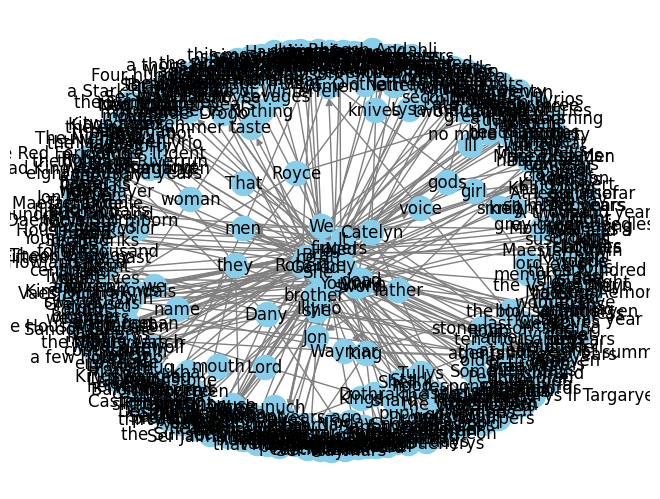

In [17]:
def build_knowledge_graph(documents):
    G = nx.DiGraph()
    for doc in documents:
        entities, relationships = process_document(doc)
        for entity, entity_type in entities:
            G.add_node(entity, type=entity_type)
        for subj, pred, obj in relationships:
            G.add_edge(subj.text, obj.text, relation=pred.text)
    return G

documents = chunks[0:15]  # The documents are the chunks of the book
knowledge_graph = build_knowledge_graph(documents)

# Visualize the graph or use it for further analysis
nx.draw(knowledge_graph, with_labels=True, node_color="skyblue", edge_color="gray")
plt.show()